In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras import regularizers
%matplotlib inline
#Importing the libraries I am goign to use 

Using TensorFlow backend.


In [6]:
from google.colab import files
uploaded = files.upload()
#I have to upload the file to google colab in order to use it afterwards

Saving creditcard.csv to creditcard.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))
#Using pandas to read the csv file.

In [8]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


This is our dataset. As you can see it consist of 284807 rows and 31 columns. Due to privacy measures the columns names are these. We have a column Time which is the time the transaction is made. We have two more columns that are important. The amount of the transaction and the Class column - whether the transaction is a fraud or not a fraud. We are trying to predict just that using all the columns except the time column.

In [9]:
df.isnull().any() #Checking whether we have a NaN 

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

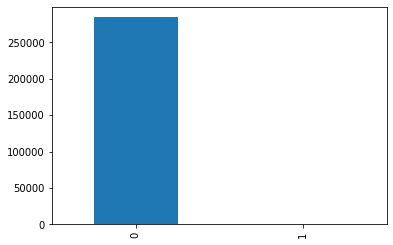

In [10]:
count_classes = df['Class'].value_counts().plot(kind = 'bar')
#There is a huge disbalance in the dataset and I do not think I can even see the frauds.

In [11]:
df['Class'].value_counts() #This is a little better. The overwhelming majority of the dataset are not frauds.

0    284315
1       492
Name: Class, dtype: int64

In [0]:
frauds = df[df['Class']==1] #This is the whole dataset where the Class column is equal to 1 - fraud

In [0]:
normal = df[df['Class']==0] #This is also the whole dataset with all the columns where the Class column is equal to 0 - fraud

In [14]:
frauds.shape

(492, 31)

In [15]:
normal.shape

(284315, 31)

In [16]:
frauds['Amount'].describe() #Just some parameters for the frauds

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [17]:
normal['Amount'].describe() #Parameters for the normal transcations

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Text(0, 0.5, 'Number of Transactions')

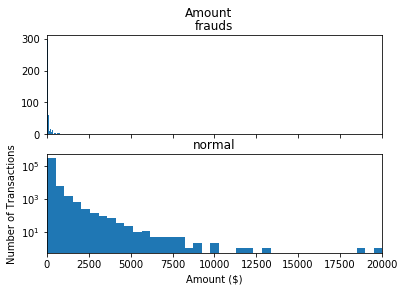

In [18]:
f, (ax1, ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount')
ax1.hist(frauds['Amount'],bins=50)
ax1.set_title('frauds')
ax2.hist(normal['Amount'],bins=50)
ax2.set_title('normal')
plt.xlim((0, 20000))
plt.yscale('log')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')

Here I am plotting the Amount and the number of the transactions made in the datast. The frauds are less than the normal transactions but I do not see any correlation at this time, we will see what the algorithm say.

Text(0.5, 1.0, 'Normal')

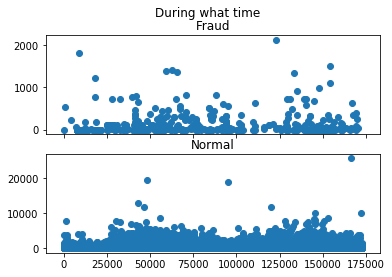

In [19]:
f, (ax1,ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('During what time')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

Here I scattered the dataset in such manner that the dots are dependant on the time the transaction is made and the amount of the transaction. It is hard to tell if there is some correlation.

In [0]:
from sklearn.preprocessing import StandardScaler #Importing the scaler

In [0]:
train = df.drop('Time',axis='columns') #I am dropping the time axis

In [0]:
train['Amount'] = StandardScaler().fit_transform(train['Amount'].values.reshape(-1,1)) #Scaling the Amount column in order the algorithm to learn faster and more accurately

In [23]:
train['Amount']

0         0.244964
1        -0.342475
2         1.160686
3         0.140534
4        -0.073403
            ...   
284802   -0.350151
284803   -0.254117
284804   -0.081839
284805   -0.313249
284806    0.514355
Name: Amount, Length: 284807, dtype: float64

In [0]:
from sklearn.model_selection import train_test_split #Helping to split the dataset

In [0]:
X_train,X_test = train_test_split(train,test_size=.2) #We are splitting the dataset into 80% train and 20%test 

In [0]:
X_train = X_train[X_train['Class']==0] 

We are going to train the algorithm only with the true values. In other words only the not fraudulent transactions will be used. When we make a prediction whether the transaction is fraud, if the mistake(MSE) is small there is high change that the transaction is not fraud. And if the loss(MSE) is high -> the transaction is a fraud.

In [0]:
X_train = X_train.drop(['Class'],axis=1) #Dropping the class column, we do not need it

In [0]:
y_test = X_test['Class'] #Just making the y_test variable

In [0]:
X_test = X_test.drop(['Class'], axis=1) #Dropping the class column from the test set also

In [0]:
X_train = X_train.values #Getting just the values without the column's names

In [0]:
X_test = X_test.values

In [32]:
X_train.shape

(227447, 29)

In [33]:
input_layer = Input(shape=(X_train.shape[1],)) #This is the input layer..sort of. We are feeding the model with the 29 columns left.

In [36]:
encoder = Dense(units=14,activation='sigmoid')(input_layer)

In [0]:
encoder = Dense(units=7,activation='relu')(encoder)

In [0]:
decoder = Dense(units=7,activation='sigmoid')((encoder))

In [0]:
decoder = Dense(units=(X_train.shape[1]),activation='relu')(decoder)

This model learn by reducing the dimensionality of the input. As you can see we have almost 30 input features and as early as the second layer they become less. This is how the encoder works. It essentially encodes the input.The activations in these layers are sigmoid and relu. They are both frequently used. As the layers of the encoder goes deeper, the units parameter are getting less. We have to put the brackets after the Dense layer in order to tell tensorflow in which way do these layers move. The last ayer is the same as the input one as it is trying to predict the actual input we gave it.

In [40]:
autoencoder = Model(inputs=input_layer,output=decoder) #This is the model

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


In [0]:
loss = tf.keras.losses.MSE #The loss in this case is Mean Squared Error

In [42]:
nb_epochs = 100
batch_size=32

autoencoder.compile(optimizer='adam',loss=loss,metrics=['accuracy'])
#Setting some parameters and optimizers

In [43]:
history = autoencoder.fit(X_train,X_train,batch_size=batch_size,epochs=nb_epochs,verbose=1,shuffle=True,validation_data=(X_test,X_test))
#We fit the autoencoder with X_train and shuffle it just in case, the validation data is X_test




Train on 227447 samples, validate on 56962 samples
Epoch 1/100





227447/227447 [==============================] - 11s 47us/step - loss: 0.9391 - acc: 0.2794 - val_loss: 0.9310 - val_acc: 0.3360
Epoch 2/100
227447/227447 [==============================] - 10s 44us/step - loss: 0.8885 - acc: 0.3511 - val_loss: 0.9102 - val_acc: 0.3639
Epoch 3/100
227447/227447 [==============================] - 10s 44us/step - loss: 0.8744 - acc: 0.3709 - val_loss: 0.9003 - val_acc: 0.3775
Epoch 4/100
227447/227447 [==============================] - 10s 43us/step - loss: 0.8672 - acc: 0.3792 - val_loss: 0.8947 - val_acc: 0.3825
Epoch 5/100
227447/227447 [==============================] - 10s 44us/step - loss: 0.8625 - acc: 0.3834 - val_loss: 0.8908 - val_acc: 0.3863
Epoch 6/100
227447/227447 [==============================] - 10s 44us/step - loss: 0.8585 - acc: 0.3858 - val_loss: 0.8869 - val_acc: 0.3876
Epoch 7/100
227447/227447 [==============================] - 10s 44us/step - loss: 0.8553 - acc

In [0]:
y_pred = autoencoder.predict(X_test) #Making prediction for X_test

In [0]:
mse = np.mean(np.power(X_test - y_pred,2),axis=1) #This is the formula for the mean squared error

In [0]:
error_df = pd.DataFrame({'reconstruction_error':mse,'true_class':y_test}) #Making a dataframe for the reconstruction error and the actual input 

In [47]:
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.00000
mean,0.832993,0.00165
std,3.333125,0.04059
min,0.095779,0.00000
25%,0.316677,0.00000
50%,0.501478,0.00000
75%,0.752839,0.00000
max,383.794288,1.00000


In [0]:
from sklearn.metrics import confusion_matrix,precision_recall_curve,classification_report,roc_curve,auc #Importing tools for visualizing the test results

In [0]:
roc_auc = auc(fpr,tpr)

In [0]:
fpr, tpr,thresholds = roc_curve(error_df['true_class'],error_df['reconstruction_error'])#This is the roc_curve. It can be seen lower down.

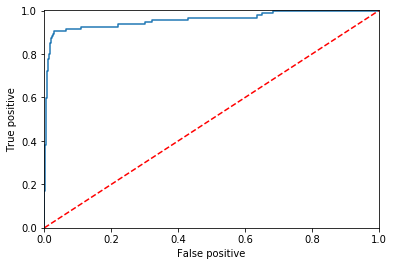

In [53]:
plt.plot(fpr,tpr,label='AUC = %0.4f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True positive')
plt.xlabel('False positive')
plt.show()

We can plot the roc_curve. This is great curve for the binary classifier and this is exactly why it is perfect for our problem. The blue line represents the outcome of our algorithm. If it is closer to the top left corner of the image,the closer it is to the actual input. It is not great but it is pretty good. We can tweak afterwards.

In [0]:
threshold = 2.7 #Setting the threshold to 2.7 

In [0]:
y_pred = [1 if e > threshold else 0 for e in error_df['reconstruction_error'].values] #If the y_pred is bigger than the threshold we initiated it is set to 1 otherwise it is set to 0

In [0]:
cm = confusion_matrix(error_df['true_class'],y_pred) #This is the confusion matrix 

In [57]:
cm #So the result is pretty good, with a little bit tweaking we could get it to becaome even more precise.

array([[54791,  2077],
       [    9,    85]])